# CS 4661 Project
## Random Forest Regression on Stock Data
Members: Nshan Kazaryan, Bailey Canham, Ly Jacky Nhiayi, Asahel Monroy

Random Forest Regression is a machine learning algorithm that uses the ensemble (multiple algorithms working together) method for regression. We will use this method on the stock data for AAL (American Airlines Group Inc.)

The code below imports the needed tools for reading the stock data and making a dataframe.

In [296]:
# import necessary tools
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# read csv file, show data
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
stock_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


Now we will prepare the data by removing all other stock information besides AAL.

We will also produce new columns for the past 100, 50, 30, and 7 entries average for each day, and remove the open, high, low, and volume columns. The reason for doing so is that when we predict future stock data, we will not have access to data such as the open, high, and low, so instead we use the average close of the past days.

In [297]:
# remove other stock data
aal_df = stock_df[0:1259]

# remove unused columns
aal_df.pop("open")
aal_df.pop("low")
aal_df.pop("high")
aal_df.pop("volume")

# add past 100, 50, 30, weekly avg
aal_df.insert(0, "weekly_avg", " ")
aal_df.insert(0, "30_entry_avg", " ")
aal_df.insert(0, "50_entry_avg", " ")
aal_df.insert(0, "100_entry_avg", " ")

# see result
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,2013-02-08,14.75,AAL
1,,,,,2013-02-11,14.46,AAL
2,,,,,2013-02-12,14.27,AAL
3,,,,,2013-02-13,14.66,AAL
4,,,,,2013-02-14,13.99,AAL
...,...,...,...,...,...,...,...
1254,,,,,2018-02-01,53.88,AAL
1255,,,,,2018-02-02,52.10,AAL
1256,,,,,2018-02-05,49.76,AAL
1257,,,,,2018-02-06,51.18,AAL


Next, we will caluclate the past entry averages using for loops and populate the new columns.

In [298]:
# get rid of warnings
pd.options.mode.chained_assignment = None

# for loops to calculate avg for each column
for x in range(14, 1259):
    aal_df["weekly_avg"][x] = aal_df["close"][x-14:x-7].mean()

for x in range(37, 1259):
    aal_df["30_entry_avg"][x] = aal_df["close"][x-30-7:x-7].mean()

for x in range(57, 1259):
    aal_df["50_entry_avg"][x] = aal_df["close"][x-50-7:x-7].mean()

for x in range(107, 1259):
    aal_df["100_entry_avg"][x] = aal_df["close"][x-100-7:x-7].mean()

# remove entries w/no data, see result
aal_df = aal_df[107:1259]
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
107,16.2605,17.2224,17.116,16.388571,2013-07-15,17.76,AAL
108,16.2805,17.2314,17.076,16.477143,2013-07-16,17.95,AAL
109,16.3043,17.2392,17.039667,16.531429,2013-07-17,18.45,AAL
110,16.331,17.2536,16.998,16.641429,2013-07-18,18.42,AAL
111,16.358,17.269,16.969667,16.791429,2013-07-19,18.23,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,2018-02-01,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,2018-02-02,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,2018-02-05,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,2018-02-06,51.18,AAL


Now, we want to have an idea of how the close data looks. Making a plot helps visualize the trends.

<function matplotlib.pyplot.show(close=None, block=None)>

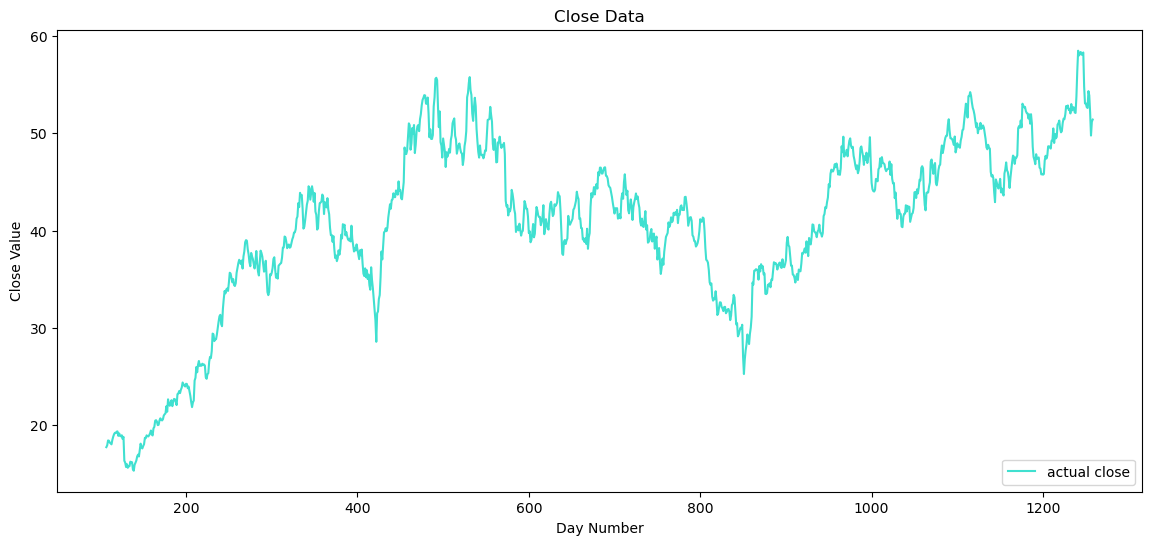

In [299]:
# setting up graph
%matplotlib inline
plt.figure(figsize=(14,6))

# plotting the data
plt.plot(aal_df.close, label='actual close', color='turquoise')

# making labels, title, legend
plt.xlabel('Day Number')
plt.ylabel('Close Value')
plt.title('Close Data')
plt.legend(loc="lower right")

# show graph
plt.show

After having visualized the data, we are now ready to use machine learning on our prepared data. The method we will be using is Random Forest Regression. With this algorithm, multiple decision trees make a prediction for the target value, and then the average of their predictions is taken. 

First we will split the data we now have into training and testing sets. Then, we will train the data with our Random Forest Regressor and predict values using the testing set.

In [300]:
# import necessary tools
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
import math

# split dataset for training and testing
feature_cols = ["100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
X = scale(aal_df[feature_cols])
y = aal_df["close"]

# split into training and testing sets
s_f = .6
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

# create algorithm object
rfr = RandomForestRegressor(n_estimators=361, random_state=2, bootstrap=True)

# train with sets
rfr.fit(X_train, y_train)

# predict values from manual test split
y_predict = rfr.predict(X_test)
print(y_predict)

[42.63063657 43.56905762 44.14897396 44.15362798 44.03396039 43.91589972
 43.92808837 43.79548476 43.78980609 43.95725762 44.21781136 44.29468116
 44.38365651 44.62806094 44.71933518 44.8098615  44.51188366 44.36842105
 43.8287867  42.81798061 40.21279778 40.72227147 40.63072022 37.83595568
 35.91307479 32.39548476 31.97371191 32.22925208 32.39927978 32.91368421
 33.39149584 36.27375291 37.39099723 37.98427978 38.03914127 38.36155125
 39.25362881 39.92304709 40.55146814 41.24216066 41.49925208 41.51271468
 41.66853186 39.21693823 38.9927831  38.99727091 38.98779668 38.98810139
 38.98391856 39.0077831  39.01415457 39.01415457 39.0051241  38.99443158
 38.9874097  38.98826842 38.98343463 38.95794986 38.95649557 38.96258975
 38.96181413 38.68696648 37.7208723  37.00882244 36.90768643 36.86397396
 36.8453036  36.84425097 37.53015125 38.70685485 38.88411219 38.89728393
 38.94017867 38.94656399 39.06573296 39.29573269 39.61528837 39.76922161
 39.77149307 39.80717175 39.80623019 39.80132715 39

Now that we have trained our model and calculated predictions, we can evaluate the accuracy of these predictions with the RMSE (Root Mean Squared Error). We will calculate the RMSE for a single prediction, and we will also perform cross validation to see how the average RMSE value compares.

In [301]:
# import necessary tool
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# calculating "Mean Square Error" (MSE)
mse = metrics.mean_squared_error(y_test, y_predict)

# using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)
print("RMSE of Prediction:\n", rmse)

# getting cross validation score average
mse_list = cross_val_score(rfr, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
mse_list_pos = -mse_list
rmse_list = np.sqrt(mse_list_pos)
print(rmse_list)
print("RMSE List Average:\n", rmse_list.mean())

RMSE of Prediction:
 4.456164876047969
[8.23837454 2.21847567 3.1734803  5.49429264 2.90095048 2.3757422
 5.6900783  5.45490564 3.48487778 5.22291742]
RMSE List Average:
 4.425409495881127


The RMSE of our prediction is 4.4561, which is not far off from the average we got from cross validation, 4.4254.

Given that the close values are in the tens (30, 40, 50, etc.), an RMSE value of 4.4561 shows that the predictions are somewhat close to the actual values. In other words, the results of the Random Forest Regression algorithm produced good results.

To visualize this, we will now plot the test close values with the predicted close values.

<function matplotlib.pyplot.show(close=None, block=None)>

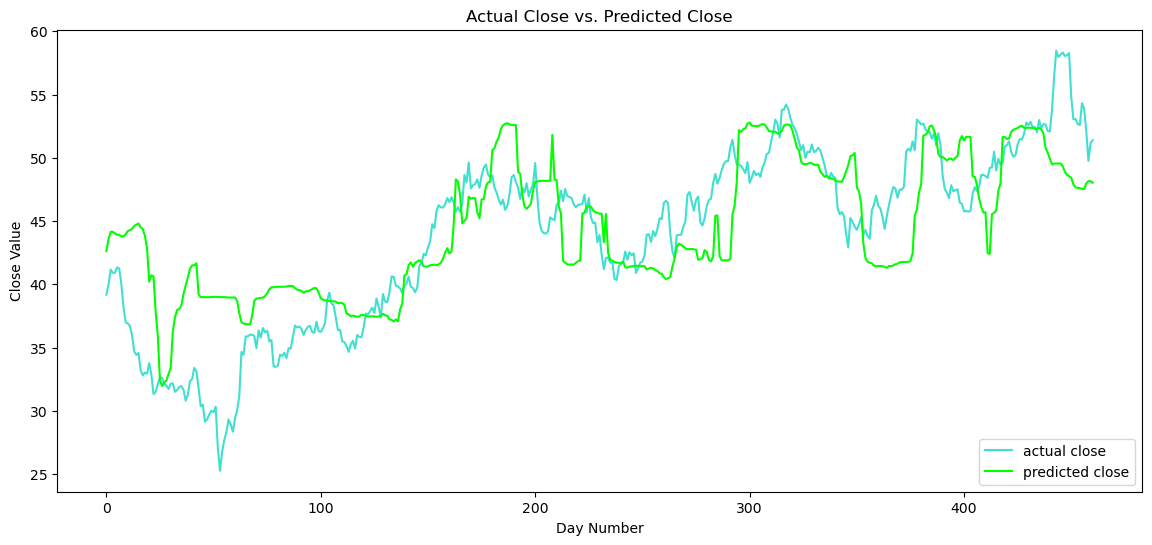

In [302]:
# reset index because predicted values don't have date tied to them
y_test = y_test.reset_index(drop=True)

# setting up graph
%matplotlib inline
plt.figure(figsize=(14,6))

# plotting the data
plt.plot(y_test, label="actual close", color="turquoise")
plt.plot(y_predict, label="predicted close", color="lime")

# making labels, title, legend
plt.xlabel('Day Number')
plt.ylabel('Close Value')
plt.title('Actual Close vs. Predicted Close')
plt.legend(loc="lower right")

# show graph
plt.show

As we can see, the Random Forest Regression ensemble method was able to predict values in the vecinity of the actual close values. However, we can see that the predicted values sometimes show sharp rises and drops when the actual values do not reflect this. There are many jumps and sharp changes in the predictions, making it difficult to see where the stock price is really headed. Although we can see the predictions are close to the actual values in the graph above, in reality we won't be able to compare to actual future stock values, so these inaccurate jumps and drops may cause problems in practice.

One parameter of our Random Forest Regression we can change to potentially increase the accuracy is the max depth of our trees. The default value of max depth results in no limit to the depth, and deep trees can lead to overfitting. Now, we will adjust the max depth of our model, train it, and test it to see if there are improvements.

In [303]:
# create algorithm object
rfr_fixed = RandomForestRegressor(n_estimators=361, random_state=2, bootstrap=True, max_depth=3)

# train with sets
rfr_fixed.fit(X_train, y_train)

# predict values from manual test split
y_predict_fixed = rfr_fixed.predict(X_test)

# calculating "Mean Square Error" (MSE)
mse_fixed = metrics.mean_squared_error(y_test, y_predict_fixed)

# using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_fixed = np.sqrt(mse_fixed)
print("RMSE of Prediction:\n", rmse_fixed)

# getting cross validation score average
mse_fixed_list = cross_val_score(rfr_fixed, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
mse_fixed_list_pos = -mse_fixed_list
rmse_fixed_list = np.sqrt(mse_fixed_list_pos)
print(rmse_fixed_list)
print("RMSE List Average:\n", rmse_fixed_list.mean())

RMSE of Prediction:
 3.4348341996647482
[7.60729034 2.68850106 3.30091102 5.14725334 2.94839157 3.70250193
 4.38157497 5.04194736 4.29644435 4.66863197]
RMSE List Average:
 4.378344791270935


Here, we see a decrease in the RMSE value from 4.4561 to 3.4348, which shows an increase in accuracy. 

We also see a slight improvement in the cross validation results, with a decrease from 4.4254 to 4.3783. This occurred after testing and fine-tuning the max depth parameter until we got the lowest possible RMSE values. 

Now, we will see the effect this had on the predictions visually with a graph.

<function matplotlib.pyplot.show(close=None, block=None)>

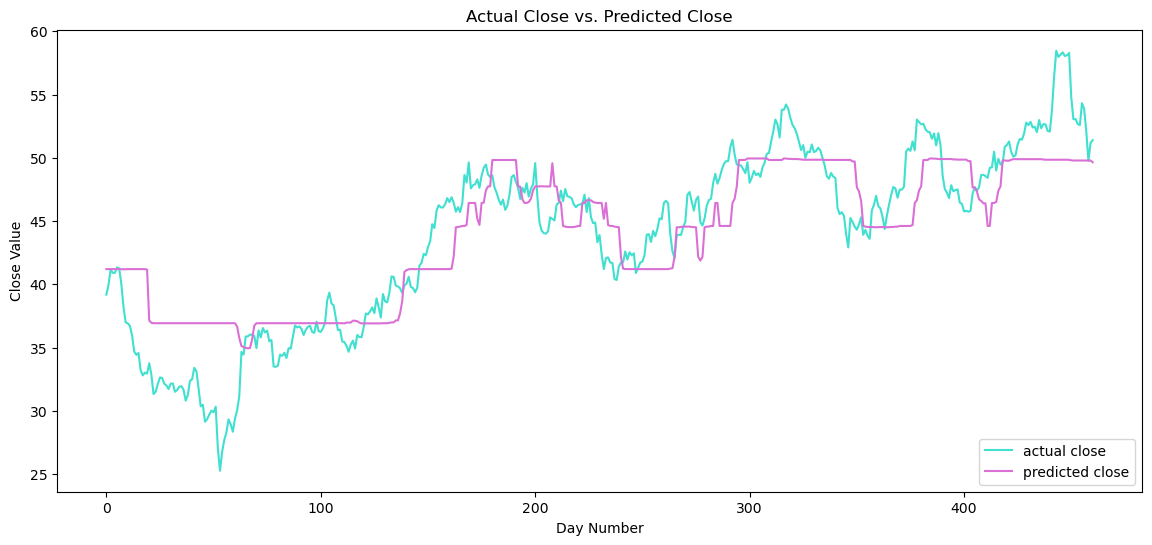

In [304]:
# reset index because predicted values don't have date tied to them
y_test = y_test.reset_index(drop=True)

# setting up graph
%matplotlib inline
plt.figure(figsize=(14,6))

# plotting the data
plt.plot(y_test, label="actual close", color="turquoise")
plt.plot(y_predict_fixed, label="predicted close", color="orchid")

# making labels, title, legend
plt.xlabel('Day Number')
plt.ylabel('Close Value')
plt.title('Actual Close vs. Predicted Close')
plt.legend(loc="lower right")

# show graph
plt.show

Now, we see a less volatile graph showing more flat areas in the prediction. In practice, having a prediction of future stock values like the one shown above makes it easy to see the general shape of the changes. We can see that in days 20 - 140, there will be a drop. We can also see peaks around days 180 - 210, 300 - 350, 380 - 400, and 420 - 450. Of course, the actual values of the drops and the peaks are not clearly shown. However, as the RMSE indicates, the predicted values are close to the actual values and the overall shape is followed closely as well. 

Keep in mind that the first .6 of the data was used for training and the last .4 of the data was for testing. This differs from the train_test_split method, which randomly takes samples from across the data for its split. We may have gotten more accurate results if we had used the train_test_split, however we wanted to be able to show predictions across time in a graph, so we manually split the data instead. 

One of the drawbacks of the Random Forest Regressor is that it cannot extrapolate data, meaning that the values it predicts will not be outside of the values it saw during training. The negative effects of this may appear more drastically in datasets that have vastly different values in the testing set when compared to the training set. Another drawback is that because the Random Forest Regressor takes the average for its predictions, it may lose to Linear Regression in certain cases when it comes to accuracy. In general, the Random Forest Regressor is best for predicting values that are within certain bounds. For some stocks, linear regression is the better option, as certain changes in the future may not be foreseen by the random forest regressor due to its limitations. 